# Bellabeat Data Analytics Case study
## 1 Ask
### 1.1 Introduction
Bellabeat is a small tech company with high hope of becoming a more successful comapny. They have several smart products that are exclusively aimed at women including a wellness tracker (Leaf), a smart watch(Time), a smart bottle(Spring) and a smart wellness app (BellaBeat app).


### 1.2 Business Task
Gain insights from other wellbeing smart devices through open source data analysis with the aim of applying these insights to the goals of the company for future growth. It is the hope of the stakeholders that insights gained from this analysis will affect future marketing decisions and business direction in order to capture more of the market.

These 3 questions will help me centre my research:
1. What are some trends in smart device usage? 
2. How could these trends apply to Bellabeat customers? 
3. How could these trends help influence Bellabeat marketing strategy? 

### 1.3 Key Stakeholders
· Urška Sršen — Bellabeat’s cofounder and Chief Creative Officer

· Sando Mur — Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team

· Bellabeat marketing analytics team — A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.

## 2 Prepare
### 2.1 introduction to the data used
Since I will be obtaining data from an open source it is imperative we conduct a full check on its reliability and validity through a ROCCC Analaysis. Since Sršen is looking to gain insights form other data, we will be using[ FitBit Fitness Tracker Data](http://https://www.kaggle.com/datasets/arashnic/fitbit) (CC0: Public Domain, dataset made available through [Mobius](http://https://www.kaggle.com/arashnic)): This Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits. It is stored in a safe location and is in wide foramt. It is however a small sample size and one should take caution when drawing strong conlcusions from the data.

### 2.2 Fitbit Tracker Data ROCCC Analysis
**Reliable** : Low (only 30 participants surveyed which would indicate a sample size bias).

**Original** : Low (These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. This is a third-party data source and the conclusions based on results must be taken with a note of caution).  

**Comprehensive** : Medium (Only 30 unique users does not represent a valid size population. It also does not specify gender which will limit our ability to conclude on BelleBeat's customer base. It also does not inlcude statistics around hydaration or water input which excludes our ability to focus on the smart water bottle. In addition to this, all datasets do not have 30 particiapnts included which means I will have to discount some datasets to increase validity). Finally, the dataset does no tinlude gender and age which severely limits my ability to draw specific conclusions.

**Current** : Low (Based off historical data in 2016 so trends may have changed in the last 6 years)

**Cited** : High. It is created by four authors: Furberg Robert, Brinton Julia, Keating Michael and Ortiz Alexa and is well documented and correctly cited.

### 2.3 Exploring the datasets
<a id="Exploring the datasets"></a>
After initial exploration of the datasets, I can see there are 18 csv files
![](https://i.imgur.com/JcyEin7.gif)
For this study I will be fousing on the daily files first to check for relationships within them.
* dailyActivity_merged.csv
* dailyIntensities_merged.csv
* dailySteps_merged.csv
* sleepDay_merged.csv
* weightLogInfo_merged.csv

I will drop data and even files if I feel there are not useful for my analysis.

### 2.4 Importing datasets into R

In [ ]:
daily_activity <- read.csv("../input/fitbitfiles-new/dailyActivity_merged.csv")
daily_steps <- read.csv("../input/fitbitfiles-new/dailySteps_merged.csv")
daily_inten <- read.csv("../input/fitbitfiles-new/dailyIntensities_merged.csv")
sleep_day <- read.csv("../input/fitbitfiles-new/sleepDay_merged.csv")
weight_log <- read.csv("../input/fitbitfiles-new/weightLogInfo_merged.csv")

### 2.4 Installing packages

In [ ]:
##Installing relevant libraries
library(tidyverse)
library(skimr)
library(here) 
library(dplyr)
library(ggplot2)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
here() starts at /kaggle/working


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## 3 Process

### 3.1 Viewing the datasets
Now we will take a quick look at the data to check for any abnormalities. I have manually checked the csv files with excel and have made minor ammendments to them including spliting time and date and reformatting columns as date or string.

In [ ]:
head(sleep_day)
head(daily_activity)
head(daily_steps)
head(weight_log)
head(daily_inten)

,Id,X,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,X.1
,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,1503960366,4/12/2016 0:00:00,1,327,346,12/04/2016,0:00:00
2,1503960366,4/13/2016 0:00:00,2,384,407,13/04/2016,0:00:00
3,1503960366,4/15/2016 0:00:00,1,412,442,15/04/2016,0:00:00
4,1503960366,4/16/2016 0:00:00,2,340,367,16/04/2016,0:00:00
5,1503960366,4/17/2016 0:00:00,1,700,712,17/04/2016,0:00:00
6,1503960366,4/19/2016 0:00:00,1,304,320,19/04/2016,0:00:00


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,04/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,ActivityDay,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,12/04/2016,13162
2,1503960366,13/04/2016,10735
3,1503960366,14/04/2016,10460
4,1503960366,15/04/2016,9762
5,1503960366,16/04/2016,12669
6,1503960366,17/04/2016,9705


,Id,Date,Time,Date.old,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<lgl>,<dbl>
1,1503960366,02/05/2016,23:59:59,5/2/2016 23:59:59,52.6,115.9631,22,22.65,TRUE,1.46223e+12
2,1503960366,03/05/2016,23:59:59,5/3/2016 23:59:59,52.6,115.9631,NA,22.65,TRUE,1.46232e+12
3,1927972279,13/04/2016,01:08:52,4/13/2016 1:08:52,133.5,294.3171,NA,47.54,FALSE,1.46051e+12
4,2873212765,21/04/2016,23:59:59,4/21/2016 23:59:59,56.7,125.0021,NA,21.45,TRUE,1.46128e+12
5,2873212765,12/05/2016,23:59:59,5/12/2016 23:59:59,57.3,126.3249,NA,21.69,TRUE,1.46310e+12
6,4319703577,17/04/2016,23:59:59,4/17/2016 23:59:59,72.4,159.6147,25,27.45,TRUE,1.46094e+12


,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,Weekday.no.
,<dbl>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1503960366,04/12/2016,728,328,13,25,0,6.06,0.55,1.88,3
2,1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57,4
3,1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44,5
4,1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14,6
5,1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71,7
6,1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19,1


### 3.2 Checking the population samples of each dataset for validity
Here we count the unique users to make sure they roughly equate to the toal number of participants.

In [ ]:
count(sleep_day,c(Id)) ## [24]
count(daily_activity,c(Id)) ## [33]
count(daily_steps,c(Id)) ## [33]
count(weight_log,c(Id)) ## [8]
count(daily_inten,c(Id)) ## [33]

c(Id),n
<dbl>,<int>
1503960366,25
1644430081,4
1844505072,3
1927972279,5
2026352035,28
2320127002,1
2347167796,15
3977333714,28
4020332650,8


c(Id),n
<dbl>,<int>
1503960366,31
1624580081,31
1644430081,30
1844505072,31
1927972279,31
2022484408,31
2026352035,31
2320127002,31
2347167796,18


c(Id),n
<dbl>,<int>
1503960366,31
1624580081,31
1644430081,30
1844505072,31
1927972279,31
2022484408,31
2026352035,31
2320127002,31
2347167796,18


c(Id),n
<dbl>,<int>
1503960366,2
1927972279,1
2873212765,2
4319703577,2
4558609924,5
5577150313,1
6962181067,30
8877689391,24
NA,932


c(Id),n
<dbl>,<int>
1503960366,31
1624580081,31
1644430081,30
1844505072,31
1927972279,31
2022484408,31
2026352035,31
2320127002,31
2347167796,18


The dataset 'Weight_log' has only 8 partipants and is therefore too low to use in our project and it will therefore be excluded from the data going forward.
"Sleep_day" has only 24 (also under 30 which is minimum statsitical sample size) but as it is for practice purposes, I will keep the data in.

### 3.3 Data cleaning
I then used the *"Glimpse"* function to quickly see how much data I had and what was needed or not. From the results, some data within the individual datasets will be dropped.

In [ ]:
glimpse(sleep_day)
glimpse(daily_activity)
glimpse(daily_steps)
glimpse(daily_inten)

Rows: 999
Columns: 7
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ X                  <chr> "4/12/2016 0:00:00", "4/13/2016 0:00:00", "4/15/201…
$ TotalSleepRecords  <int> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <int> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…
$ Date               <chr> "12/04/2016", "13/04/2016", "15/04/2016", "16/04/20…
$ X.1                <chr> "0:00:00", "0:00:00", "0:00:00", "0:00:00", "0:00:0…
Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "04/12/2016", "4/13/2016", "4/14/2016", "4/15…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.

Next, I used *"skim_without_charts"* to check for any missing values. There was not.

In [ ]:
skim_without_charts(sleep_day)
skim_without_charts(daily_activity)
skim_without_charts(daily_steps)
skim_without_charts(daily_inten)

Next I wanted to convert all column names to lower case

In [ ]:
daily_activity <- rename_with(daily_activity,tolower)
sleep_day <- rename_with(sleep_day,tolower)
daily_steps <- rename_with(daily_steps,tolower)
daily_inten <- rename_with(daily_inten,tolower)

In [ ]:
head(daily_activity,3)
head(sleep_day,1)
head(daily_steps,1)
head(daily_inten,1)

### 3.4 Coorecting errors in date format

In [ ]:
#daily_activity dataset
daily_activity <- daily_activity %>% 
  rename(date = activitydate) %>% 
  mutate(date = as.Date(date, format = "%D/%M/%Y"))

#sleep_day dataset
sleep_day <- sleep_day %>% 
  rename(date = date) %>% 
  mutate(date = as.Date(date,format ="%d/%m/%Y"))
format(ymd_hms(sleep_day$date), "%d/%m/%Y")

##daily_steps dataset
daily_steps <- daily_steps %>%
rename(date = activityday) %>%
mutate(date =as.Date(date, format = "%D/%M/%Y"))

##daily_inten dataset

daily_inten <- daily_inten %>%
rename(date =activityday) %>%
mutate(date = as.Date(date, format ="%D/%M/%Y"))

Now I will check that the format is now correct using the head fucntion.

In [ ]:
head(sleep_day,3)
head(daily_activity,3)
head(daily_steps,3)
head(daily_inten,3)

## 4. Analyze
To begin with, I will state my hypothesis that I will explore:
1. Total calories burned and total distance covered are positivily correlated
2. Sleep has a stromng relationship with activity
3. Users regularly do not reach 10,000 daily steps (recommended average for adults acoording to the American Heart Association)

### 4.1 Total steps ≈ total distance
The total distance and steps should be the same so I will test this first before assuming.

In [ ]:
ggplot(data = daily_activity) +
  geom_point(mapping = aes(x = totaldistance, y =totalsteps), color='dark green')+
  geom_smooth(mapping = aes(x = totaldistance, y =totalsteps))+
  labs(title="Total distance vs.Total steps")

In [ ]:
#Again assuming greater distance leads to greater calories burnt
ggplot(data = daily_activity) +
  geom_point(mapping = aes(x = totaldistance, y =calories) , color='dark green')+
  geom_smooth(mapping = aes(x = totaldistance, y =calories))+
  labs(title="Total distance vs. Total calories")

In [ ]:
cor.test(daily_activity$totaldistance, daily_activity$calories)
cor.test(daily_activity$totaldistance, daily_activity$totalsteps)

As we can see from above, unsurprisingly there is a strong positive (0.65) correlation between total distance and calories and a very strong positive (0.9) correlation between total distance and steps.

This is useful to confirm as we can now assume steps, distance, calories are all strongly related.

### 4.2 Merging Acivity and sleep datasets
As I would like to investigate the coorelation between activity and sleep, I will merge them into a new dataset using their unique key: 'Id'

In [ ]:
daily_activity_with_sleep <- merge(sleep_day, daily_activity, by=c("id"))

In [ ]:
glimpse(daily_activity)
glimpse(sleep_day)

### 4.3 Sleep and its role in overall wellbeing
The next plot aims to show the correlation between minutes asleep and minutes spent in sedantry to start our investigation in to how activity influences sleep.

In [ ]:
ggplot(data=daily_activity_with_sleep, aes(x=totalminutesasleep, y=sedentaryminutes)) + 
  geom_point(color="dark green") + geom_smooth(formula = y ~ x, method=lm) +
  labs(title="Minutes Asleep vs. Sedentary Minutes", x="Minutes Asleep",y="Sedentry Minutes")

There is a weak negative relationship between sleep time and sedentary time. This shows us that the more sedentry or inactive one is, the less sleep they get. This is a weak realtionship and so caution must be taken when making strong assumptions. We can learn more about this assumption however by looking at how active users (steps) relate to sleep.

In [ ]:
ggplot(data = daily_activity_with_sleep) + 
  geom_point(mapping = aes(x = totalminutesasleep, y =totalsteps))+
  geom_smooth(mapping = aes(x = totalminutesasleep, y =totalsteps))+
  labs(title="Average asleep mins vs. Average steps by person")+
  scale_x_continuous(breaks = seq(0,720,60))+
  scale_y_continuous(breaks = seq(0,1500,300))

In [ ]:
head(daily_activity_with_sleep, 3)

In [ ]:
cor.test(daily_activity_with_sleep$totalsteps, daily_activity_with_sleep$totalminutesasleep)

The correlation value is -0.19 which is statistally insignificant so we cannot say with confidence that more steps leads to longer sleep.

In [ ]:
ggplot(data = daily_activity_with_sleep) +
  labs(title = "Sleep vs Daily Activity (Total Steps & Calories)", x = "Total Time Asleep (min)", y = "Total Steps") + 
  geom_point(mapping = aes( x = totalminutesasleep, y = totalsteps, color = calories )) +
  geom_smooth(formula = y ~ x, method=lm, mapping = aes(y = totalsteps, x = totalminutesasleep), color = "blue") +
  geom_vline(xintercept=420,linetype="dashed",size=.5, color = "red") +
  geom_vline(xintercept=540,linetype="dashed",size=.5, color = "red")

Inside our red margins correspond to the ideal bracket for sleep. As we can see, most cases are outside the ideal sleep amount proving that most users do not sleep the required amount regarddlessof their activity and steps taken. Now let;s get some specific numbers to add to this observation.

In [ ]:
#No of ocuurances partipants who slept less than the recommended 7 hours (420mins)
sleep_day %>%
count(totalminutesasleep <420)

In [ ]:
##Underslept
n=182

In [ ]:
#Occurances of those who slept more than recommended 9 hours (540mins)
sleep_day %>%
count(totalminutesasleep >540)

In [ ]:
##Overslept
n = 39

**Conclusion**
We have learned that although those who have a more active lifestyle on average sleep better, users of all activity levels by and large do not get the recommended sleep. Again, caution must be paid to this area of the investigation as the dataset we are drawing from is below statistical optimal size (30) as it is pooled from only 24 users. In addition, it is focused on measuring quantity of sleep and not quality of sleep.
Despite proving the relationship between activity and sleep, we have not proved causation. Activity rate does not direclty mean that it will influence your sleep according to our limited dataset.
However, we do know that more sedantry minutes can lead to less sleep and therefore promoting more active minutes on a smart watch can reduce this sedentary time and possibly increase sleep.
Finally, according to the [CDC](http://https://www.cdc.gov/sleep/data_statistics.html), 32.5% of all US adults state they do not get enough sleep. [The National library of medicdine](http://https://pubmed.ncbi.nlm.nih.gov/26833831/) have reported that women are 40% more likely to suffer from insomnia. There is a market for people who want to improve their sleep and if we assume that people who are buying smart devices for their health are actively concerned about their overall wellbeing, the potential to improve sleep with the smart devices proves an excellent potential revenue stream.

### 4.4 What users log
In order to underastand how to improve BellaBeats market reach, let us investigate how the users are logging or using their smart watches.
There are options to log your physical activity (ie run, walk, jog, yoag etc), weight log and sleep log. Let us see what the users actually used:
In total 33 users logged activities, 24 logged sleep and 8 logged weight. That is represented by the pie chart below.

In [ ]:
# Install the library.
library(plotrix)
 
# Create data for the graph.
Total_users <- c(33,24,8)
labels <- c("Activity", "Sleep", "Weight")
 
piepercent<- round(100 * Total_users / sum(Total_users), 1)
 
# Plot the chart.
pie3D(Total_users, labels = piepercent,
    main = "Types of activities logged by users", col = rainbow(length(Total_users)))
legend("topright", c("Physical activity", "Sleep", "Weight log"),
                    cex = 1.0, fill = rainbow(length(Total_users)))

Here very few of the users actually use the sleep log fucntion in comparison to the other functions. This could be a position for which Bellebeats could take adavantage of. F
In addition, it is argued here that what can be seen as a disadvantage in a poor population sample, can also be seen as an opportunity to try promote this important features with users. The fact that only 18% (8/44) of the users bothered to log the all important sleep time, most useres are therefore missing an essential part of the equation to overall better wellbeing.

### 4.5 Daily steps
According to the National Institute of Health, the number of steps are more important than the intensity and all adults should aim for 10,000 steps every day. As you can see below, 61% of those sampled do not reach this threshold and the levels of vary dramatically depending on the day of the week seeing Sunday and Monday having the fewest steps.

In [ ]:
#calculating percentage of users who average less than 10,000 steps a day
round(nrow(daily_activity_with_sleep[daily_activity_with_sleep$totalsteps < 10000,]) / nrow(daily_activity_with_sleep) * 100)
## n = 61% of all users get under 10,000 steps

In [ ]:
plot(daily_activity_with_sleep$totalsteps, daily_activity_with_sleep$date,
xlab = "Time",
ylab= "Daily total steps") 
abline(h=10000, col="blue")

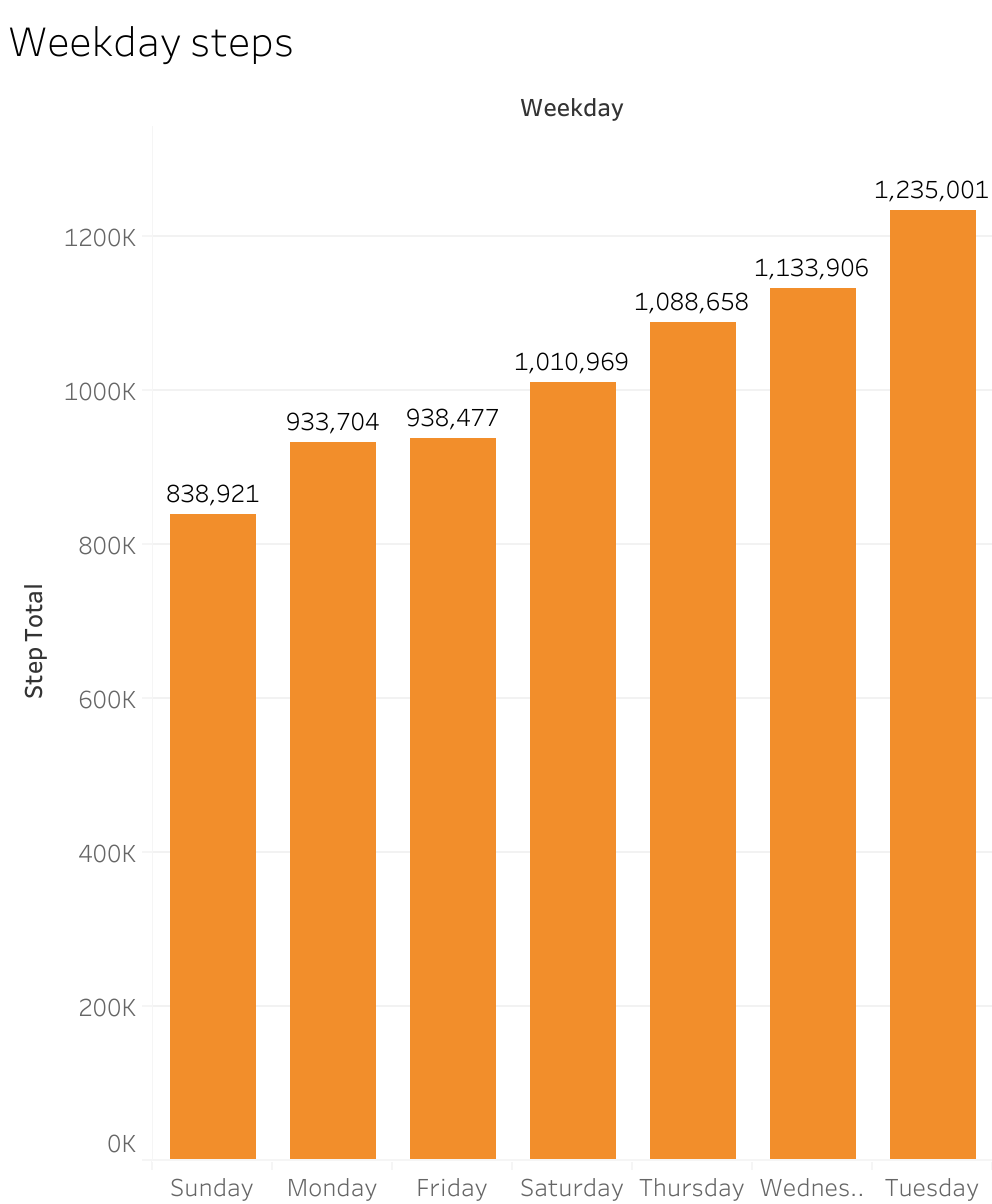

**Conclusion**
The pattern that has emerged from studying the steps data is that regardless of activity level, most users do not get the required 10,000 daily steps. It is also observable that Sunday and Monday and Friday are the most inactive days on average for Fitbit users.
When these two facts are combined, it is clear that theire is a potential for Bellabeats to promote greater use of their products during these times to achieve the 10,000 step goal.

## 5 Act
### 5.1 Overall conclusion
From my analysis, I have observed that greater efforts should be make to make the device more useful in promoting better health through the promotion of regular movement throughout the day; including weight measurements more often in order to track and recommend more tailored insights for the users and finally find a way of getting users to take more daily steps.

### 5.2 Recommendations
1. Reduce sedentry minutes through daily competitions. 
I recommend Bellabeats focus on developing a user community in their app in order for users to support and push each other. This can be done through regular competitions and events. For example, every Sunday a Sunday step competition could be held where each user has to try and beat a certain number of steps or a certain average heart rate for a period of time. We can also use this strategy to target days of the week that I have shown are more sedentary than others. Targeting Sunday and Monday for example, would lead to a much healthier weekly average of steps and activity.
2. Built in fitness plans
Since the data showed that users are actively taking a role in becoming healthier, I would recommend that Bellabeats develops fitness plans in their app that can be tracked and monitored through the hardware. For example, a 2k run could be tracked on the watch and the statistics would be uploaded onto the app. Many psychologists recommed that writing down in advance a timeframe for wellbeing is a much more successful way of completing a fitness schedule and this feature would achieve this aim. Knowing in advance what days you will train will increase the liklihood of training.
3. Improve how users log weight.
Here I would recommed partnering with other smart devices that measure weight such as a smart weighing scales. By making it simple and reliable to weigh oneself, the importnat data can be added to the equation which will result in more accurate recommendations for the users. In combination with a fitness plan, users could use ther weigh logs as an extra incentive to train by seeing tangible results on their app.
4. Promote daily sleep
This can be achieved in many ways. I would recommed a two-fold approach. 
a) If the users input their morning alarms through the device then they can use push notifications ot promt the user to start winding down for bed 8 to 9 hours before the alarm. 
b) Research has shown that amongst the many things that promote better sleep are having less coffee 10 hours before sleep and also having a sleep routine before bed. The latter is something Bellabeat can use as they cna prompt users to sit and meditate before bed. A simple breathing exercise would be very effective in getting the body ready for sleep. They may also want to include a way of logging coffee on their devices too in order to better help users sleep well.


In conclusion, the data is weak and will need additional data to be added to it to draw any concrete recommendations but I feel that my insights are a valuable starting point for which further exploration can be launched. I have gained valuable insights and given recommendations for future marketing strategies and therefore have tackled teh business task and considered all of the stakeholders.

If you have any recommendations or questions about my case study, please do not hesitate to get in contact with me directly.